# Spotify Music Recommendation System

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import numpy as np # load numpy library
import pandas as pd # load pandas library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive//Skill harvest/spotify_millsongdata_Recommendation.csv')

Inspect the First Few Rows

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


Check dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


Check the Dimensions of the Dataset

In [ ]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 57650
Number of columns: 4


Check for Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
artist    0
song      0
link      0
text      0
dtype: int64


 Check for duplicate rows

In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 0


Check for null values

In [ ]:
df.isna().sum()

artist    0
song      0
link      0
text      0
dtype: int64

 # text analysis

1. Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (run this line only once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)

2. Word Frequency Analysis

In [ ]:
# Word Frequency Analysis
# Calculate word frequencies
word_frequencies = df['clean_text'].str.split(expand=True).stack().value_counts()

# Display top 20 most frequent words
print("Top 20 most frequent words:")
print(word_frequencies.head(20))


Top 20 most frequent words:
love     93884
know     72494
like     63567
got      61045
oh       59719
na       48458
one      44700
go       43826
time     43531
get      43443
baby     41725
see      41009
want     39829
never    39378
let      38713
ca       36307
come     36222
say      34241
yeah     34130
way      33280
Name: count, dtype: int64


3. Sentiment Analysis:

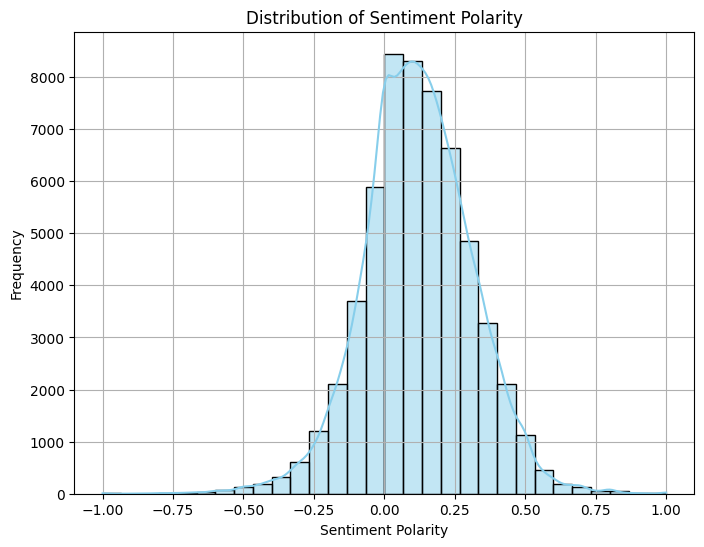

In [ ]:
from textblob import TextBlob

# Sentiment Analysis
# Calculate sentiment polarity of each song
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Artist Analysis

1. Number of Songs per Artist:

Top 10 most prolific artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


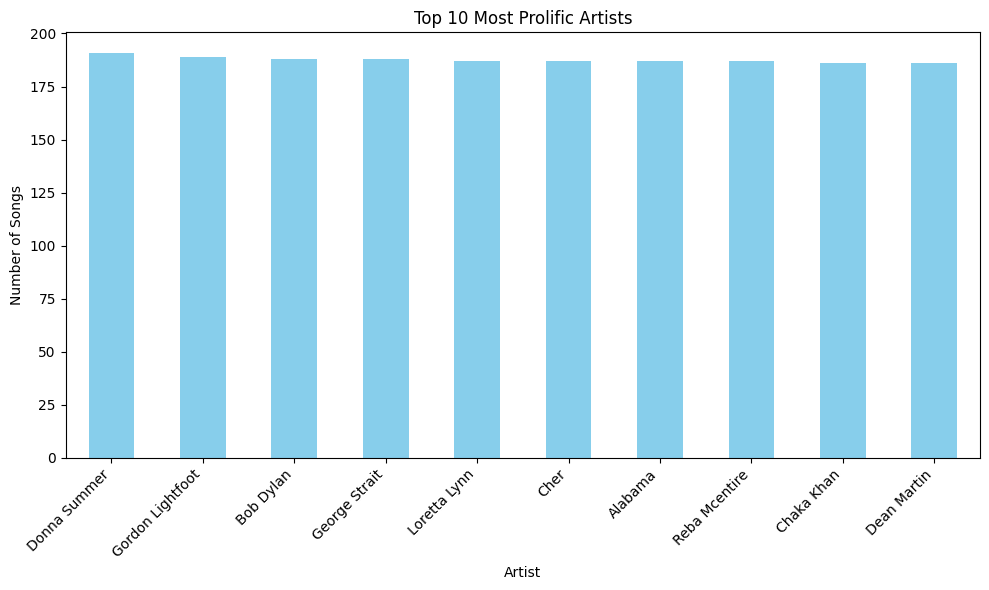

In [ ]:
# Count the number of songs per artist
songs_per_artist = df['artist'].value_counts()

# Display the top 10 most prolific artists
print("Top 10 most prolific artists:")
print(songs_per_artist.head(10))

# Plot the distribution of songs per artist
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
songs_per_artist.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prolific Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


word cloud of the most popular artist

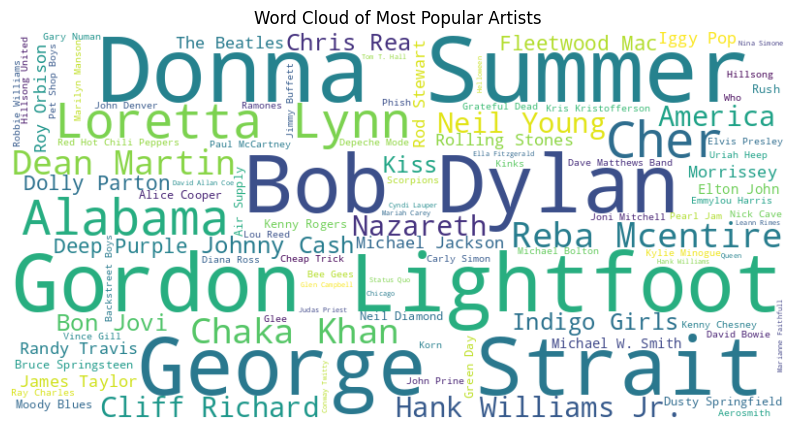

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the frequency of each artist in the dataset
artist_counts = df['artist'].value_counts()

# Select the top 10 most popular artists (you can adjust the number as needed)
top_artists = artist_counts.head(100)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Popular Artists')
plt.axis('off')
plt.show()


# The Model

content-based filtering model using TF-IDF vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class ContentBasedRecommender:
    def __init__(self, df):
        self.df = df
        self.tfidf_vectorizer = TfidfVectorizer()
        self.tfidf_matrix = self._compute_tfidf_matrix()

    def _compute_tfidf_matrix(self):
        # Compute TF-IDF matrix from 'text' field
        tfidf_matrix = self.tfidf_vectorizer.fit_transform(self.df['text'])
        return tfidf_matrix

    def recommend(self, song_text, top_n=5):
        # Compute TF-IDF vector for the input song text
        input_tfidf = self.tfidf_vectorizer.transform([song_text])

        # Compute cosine similarity between input song and all other songs
        similarities = cosine_similarity(input_tfidf, self.tfidf_matrix).flatten()

        # Get indices of top N most similar songs
        top_indices = similarities.argsort()[::-1][:top_n]

        # Return recommendations
        recommended_songs = self.df.iloc[top_indices]
        return recommended_songs



Model Evaluation

In [ ]:
# usage:
# Initialize ContentBasedRecommender with your DataFrame
content_recommender = ContentBasedRecommender(df)

# input song text
input_song_text = "Crazy World"

# Get recommendations for the input song
recommendations = content_recommender.recommend(input_song_text)

# Print recommended songs
print("Recommended Songs:")
print(recommendations[['artist', 'song', 'text']])


Recommended Songs:
            artist                 song  \
40622         Kiss  Crazy, Crazy Nights   
51412    Scorpions          Crazy World   
47348  Pat Benatar                Crazy   
13839   Neil Young                Crazy   
47404  Patsy Cline                Crazy   

                                                    text  
40622  People try to take my soul away, but I don't h...  
51412  I get up in the morning  \r\nFor my dose of th...  
47348  People like to shake you up and put you down  ...  
13839  I'm crazy, crazy for feeling so lonely  \r\nI'...  
47404  Crazy, I'm crazy for feeling so lonely  \r\nI'...  


# Model Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reduce dataset size by sampling
sampled_df = df.sample(n=30000, random_state=42)

# Split the sampled dataset into training and test sets
train_df, test_df = train_test_split(sampled_df, test_size=0.2, random_state=42)

# Initialize ContentBasedRecommender with training data
content_recommender = ContentBasedRecommender(train_df)

# Evaluate the model on the test set
true_labels = []
predicted_labels = []

for _, row in test_df.iterrows():
    input_song_text = row['text']  # Get the text of the test sample
    true_label = row['artist']  # Get the true label (artist) of the test sample

    # Get recommendations for the input song
    recommendations = content_recommender.recommend(input_song_text, top_n=1)

    # Predicted label is the artist of the top recommended song
    predicted_label = recommendations.iloc[0]['artist']

    # Append true and predicted labels to the lists
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.033166666666666664
